This notebook is about Jack's Car Rental Problem, as described in Sutton's Reinforcement Learning book, 2nd edition, page 65.

Here is a summary of the problem:

Jack manages two locations for a nationwide car rental company.
Each day, some number of customers arrive at each location to rent cars.
If Jack has a car available, he rents it out and is credited \$10 by the national company. If he is out of cars at that location, then the business is lost.
Cars become available for renting the day after they are returned.
To help ensure that cars are available where they are needed, Jack can move them between the two locations overnight, at a cost of \$2 per car moved.
We assume that the number of cars requested and returned at each location are Poisson random variables, wwhere the expected numbers are 3 and 4 for rental requests at the first and second locations and 3 and 2 for returns.

To simplify the problem slightly, we assume that there can be no more than 20 cars at each location (any additional cars are returned to the nationwide company, and thus disappear from the problem) and a maximum of five cars can be moved from one location to the other in one night.

We first apply Policy Iteration to this problem, as suggested in the book, and then also apply Value Iteration which achieves the same results much faster. 

In [1]:
import time

import matplotlib.pyplot as plt

from baserl.common import *
from baserl.jacks_rental import JacksRental

In [2]:
%matplotlib inline

iterative_policy_evaluation num_iter: 93
mean value: 398.420303762
states changed policy: 120
iterative_policy_evaluation num_iter: 100
mean value: 458.39322536
states changed policy: 33
iterative_policy_evaluation num_iter: 99
mean value: 459.173934488
states changed policy: 0
value function at iteration 3


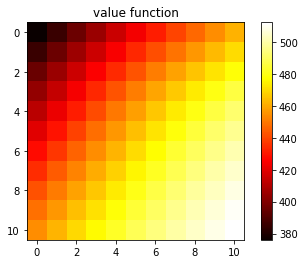


greedy policy at iteration 3
 0  0  0  0  0  0  0 -1 -1 -2 
 0  0  0  0  0  0  0  0 -1 -1 
 0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 
 1  1  1  0  0  0  0  0  0  0 
 2  2  1  1  0  0  0  0  0  0 
 3  2  2  1  1  0  0  0  0  0 
 3  3  2  2  1  0  0  0  0  0 
 4  3  3  2  1  0  0  0  0  0 
 4  4  3  2  1  1  1  1  1  1 

Done in time: 7.465210676193237


In [3]:
# Applying Policy Iteration to Jack's Car Rental problem 
mdp = JacksRental()
start_time = time.time()
v_history = []
mdp_policy, mdp_v = policy_iteration(
        states=mdp.states(),
        is_terminal=mdp.is_terminal, 
        actions=mdp.actions,
        transitions=mdp.transitions,
        gamma=mdp.gamma(),
        policy_evaluator=make_iterative_policy_evaluator(theta=0.000001, max_iter=100),
        delta_policy_improv=0.000001,
        max_iter_policy_improv=10,
        print_value=mdp.print_value,
        print_policy=mdp.print_policy)
print("Done in time:", time.time()-start_time)

delta at iteration: 1 260.957709341
delta at iteration: 2 118.774453253
delta at iteration: 3 61.2286458473
delta at iteration: 4 48.6333258468
delta at iteration: 5 39.7562303825
delta at iteration: 6 32.0297231044
delta at iteration: 7 25.9813828593
delta at iteration: 8 21.4035136438
delta at iteration: 9 17.7383722025
delta at iteration: 10 14.6746149045
delta at iteration: 11 12.1377099843
delta at iteration: 12 10.0495683979
delta at iteration: 13 8.32917343463
delta at iteration: 14 6.9043118688
delta at iteration: 15 5.7234199491
delta at iteration: 16 4.74520625943
delta at iteration: 17 3.9347550163
delta at iteration: 18 3.2632045465
delta at iteration: 19 2.70724553128
delta at iteration: 20 2.24655174975
delta at iteration: 21 1.86440926506
delta at iteration: 22 1.5473015492
delta at iteration: 23 1.28413450953
delta at iteration: 24 1.0657284351
delta at iteration: 25 0.88446948706
delta at iteration: 26 0.734039346075
delta at iteration: 27 0.609194444547
delta at itera

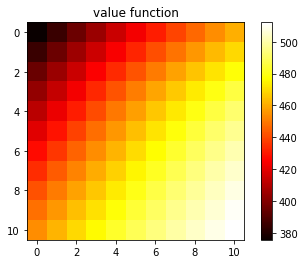


policy:
 0  0  0  0  0  0  0 -1 -1 -2 
 0  0  0  0  0  0  0  0 -1 -1 
 0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 
 1  1  1  0  0  0  0  0  0  0 
 2  2  1  1  0  0  0  0  0  0 
 3  2  2  1  1  0  0  0  0  0 
 3  3  2  2  1  0  0  0  0  0 
 4  3  3  2  1  0  0  0  0  0 
 4  4  3  2  1  1  1  1  1  1 

Done in time: 2.5931475162506104


In [4]:
# Applying Value Iteration to Jack's Car Rental problem.
# We achieve the same results as with Policy Iteration, but a few times faster.
mdp = JacksRental()
start_time = time.time()
v_history = []
mdp_policy, mdp_v = value_iteration(
        states=mdp.states(), 
        is_terminal=mdp.is_terminal, 
        actions=mdp.actions,
        transitions=mdp.transitions,
        gamma=mdp.gamma(),
        delta_threshold=0.1,
        max_iter=100,
        print_value=mdp.print_value,
        print_policy=mdp.print_policy)
print("Done in time:", time.time()-start_time)